# Clean Data

Thêm thư viện

In [86]:
import warnings
import pandas as pd
import numpy as np
warnings.simplefilter(action='ignore')


Đọc dữ liệu đầu vào và đổi tên cột

In [87]:
df = pd.read_csv('raw data/raw data.csv')
df.rename(columns={'headquaters': 'Headquarters', 'location_count': 'LocationCount', 'industry_string': 'Industry' }, inplace=True)
df.head()


,Unnamed: 0,TotalEmployees,TotalEmployeesIndia,Rating,UrlName,CompanyType,Name,CompanyReviewsLive,CompanySalaries,InterviewExperiencesLive,...,ShortName,Logo,HQCountry,Headquarters,CompanyJobsLive,HQUrlName,CompanyId,LocationCount,Industry,Subscribed
0,0,100001+,100001+,3.92,tcs,Public,Tata Consultancy Services,41589,394003,2783,...,TCS,tcs,India,"Mumbai,Maharashtra",55,mumbai,42,240,"BPO / Call Centre,IT Services & Consulting",0
1,1,100001+,100001+,4.14,accenture,Public,Accenture,27770,268685,2177,...,Accenture,accenture,Ireland,"Dublin,Dublin",7294,NaN,273,132,"IT Services & Consulting,Software Product",0
2,2,100001+,100001+,3.94,cognizant,Private,Cognizant,25176,272214,1748,...,Cognizant,cognizant-technology-solutions,United States (USA),"Teaneck,New Jersey",316,NaN,43,88,IT Services & Consulting,0
3,3,50001-100000,50001-100000,4.02,icici-bank,Public,ICICI Bank,32063,100049,940,...,ICICI Bank,icici_bank,India,"Mumbai,Maharashtra",150,mumbai,134,995,"Financial Services,Banking",0
4,4,100001+,100001+,3.93,wipro,Public,Wipro,23674,200635,1819,...,Wipro,wipro,India,"Bangalore/Bengaluru,Karnataka",520,bengaluru,44,254,IT Services & Consulting,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                9988 non-null   int64  
 1   TotalEmployees            9158 non-null   object 
 2   TotalEmployeesIndia       8364 non-null   object 
 3   Rating                    9988 non-null   float64
 4   UrlName                   9988 non-null   object 
 5   CompanyType               8423 non-null   object 
 6   Name                      9988 non-null   object 
 7   CompanyReviewsLive        9988 non-null   int64  
 8   CompanySalaries           9988 non-null   int64  
 9   InterviewExperiencesLive  9988 non-null   int64  
 10  Age                       9988 non-null   int64  
 11  ShortName                 9988 non-null   object 
 12  Logo                      9639 non-null   object 
 13  HQCountry                 9625 non-null   object 
 14  Headquar

Xóa những cột không cần thiết cho mô hình dự đoán

In [89]:
df.drop(['Unnamed: 0', 'UrlName', 'ShortName', 'Logo', 'HQUrlName',
        'CompanyId', 'Subscribed'], axis=1, inplace=True)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalEmployees            9158 non-null   object 
 1   TotalEmployeesIndia       8364 non-null   object 
 2   Rating                    9988 non-null   float64
 3   CompanyType               8423 non-null   object 
 4   Name                      9988 non-null   object 
 5   CompanyReviewsLive        9988 non-null   int64  
 6   CompanySalaries           9988 non-null   int64  
 7   InterviewExperiencesLive  9988 non-null   int64  
 8   Age                       9988 non-null   int64  
 9   HQCountry                 9625 non-null   object 
 10  Headquarters              9673 non-null   object 
 11  CompanyJobsLive           9988 non-null   int64  
 12  LocationCount             9988 non-null   int64  
 13  Industry                  9870 non-null   object 
dtypes: float

## TotalEmployees and TotalEmployeesIndia

Xuất ra các giá trị độc nhất của cột Total Employees

In [91]:
df.TotalEmployees.unique()

array(['100001+', '50001-100000', '10001-50000', '5001-10000',
       '1001-5000', nan, '39576', '501-1000', '201-500', '51-200',
       '11-50', '10000+', '1-10', '94072'], dtype=object)

Xuất ra các giá trị độc nhất của cột Total Employees India

In [92]:
df.TotalEmployeesIndia.unique()

array(['100001+', '50001-100000', '10001-50000', '5001-10000',
       '1001-5000', '201-500', nan, '501-1000', '11-50', '51-200', '1-10'],
      dtype=object)

Hàm làm sạch giá trị của cột Total Employees và Total Employees India

In [93]:
def clean_total_employees(x):
    x = str(x)
    if x == 'nan':
        return None
    if '+' in x:
        return int(x.split('+')[0])
    elif '-' in x:
        return int(int(x.split('-')[0]) + int(x.split('-')[1]) / 2)
    else:
        return int(x)

In [94]:
df.TotalEmployees = df.TotalEmployees.apply(clean_total_employees)
df.TotalEmployees.unique()

array([1.00001e+05, 3.50010e+04, 1.00010e+04, 3.50100e+03,         nan,
       3.95760e+04, 1.00100e+03, 4.51000e+02, 1.51000e+02, 3.60000e+01,
       1.00000e+04, 6.00000e+00, 9.40720e+04])

In [95]:
df.TotalEmployeesIndia = df.TotalEmployeesIndia.apply(clean_total_employees)
df.TotalEmployeesIndia.unique()

array([1.00001e+05, 3.50010e+04, 1.00010e+04, 3.50100e+03, 4.51000e+02,
               nan, 1.00100e+03, 3.60000e+01, 1.51000e+02, 6.00000e+00])

## CompanyType

Đếm số lượng dữ liệu của loại công ty

In [96]:
df.CompanyType.value_counts()

Private    6171
Public     1838
LLP          43
JV           24
LLC          19
           ... 
167012        1
4656023       1
4610381       1
4617407       1
4779713       1
Name: CompanyType, Length: 268, dtype: int64

Hàm làm sạch giá trị của cột CompanyType

In [97]:
def clean_company_type(x):
    company_type = ['Public', 'Private', 'Partnership', 'JV', 'LLP', 'Govt Organisation',
                    'Central Public Sector Enterprises (CPSE)', 'Conglomerate',
                    'LLC', 'NGO/NPO', 'Other', 'Sole Proprietorship', 'Proprietorship', 'Sole proprietorship', 'One person company']
    if x == 'nan':
        return None
    if x in company_type:
        return x
    return None


df.CompanyType = df.CompanyType.apply(clean_company_type)
df.CompanyType.value_counts()


Private                                     6171
Public                                      1838
LLP                                           43
JV                                            24
LLC                                           19
NGO/NPO                                       17
Partnership                                   11
Govt Organisation                              6
Other                                          4
Sole Proprietorship                            2
Central Public Sector Enterprises (CPSE)       1
Conglomerate                                   1
Proprietorship                                 1
Sole proprietorship                            1
One person company                             1
Name: CompanyType, dtype: int64

## HQCountry

Đếm số lượng dữ liệu của công ty ở các nước

In [98]:
df.HQCountry.value_counts()

India                  7209
United States (USA)     575
United States           407
Germany                 136
Japan                    91
                       ... 
Holland                   1
Ireland{Republic}         1
Korea                     1
Republic of Korea         1
Dubai                     1
Name: HQCountry, Length: 94, dtype: int64

Hàm làm sạch giá trị của cột HQCountry

In [99]:
def clean_country(x):
    if x == 'nan':
        return None
    return x

df.HQCountry = df.HQCountry.apply(clean_country)
df.HQCountry.value_counts()

India                  7209
United States (USA)     575
United States           407
Germany                 136
Japan                    91
                       ... 
Holland                   1
Ireland{Republic}         1
Korea                     1
Republic of Korea         1
Dubai                     1
Name: HQCountry, Length: 94, dtype: int64

## Headquarters

Đếm số lượng dữ liệu vị trí các trụ sở chính

In [100]:
df.Headquarters.value_counts()

Mumbai,Maharashtra               990
Mumbai                           471
New Delhi                        351
Bangalore/Bengaluru,Karnataka    339
Chennai,Tamil Nadu               323
                                ... 
Sao Paulo,Sao Paulo                1
Virginia                           1
Bothell,Washington                 1
Lincoln,Nebraska                   1
Ajmer                              1
Name: Headquarters, Length: 1512, dtype: int64

Hàm làm sạch giá trị của cột Headquarters

In [101]:
def clean_headquarter(x):
    x = str(x)
    if x == 'nan':
        return None
    x = x.split(',')[0]
    return x

df.Headquarters = df.Headquarters.apply(clean_headquarter)
df.Headquarters.value_counts()

Mumbai          1462
Chennai          468
Delhi/NCR        394
New Delhi        394
Noida            382
                ... 
Kolding            1
Virginia           1
Bothell            1
Lincoln            1
Ananthapuram       1
Name: Headquarters, Length: 1163, dtype: int64

## Industry

In [102]:
df.Industry.value_counts()

IT Services & Consulting                                                            517
Engineering & Construction                                                          347
Education / Training                                                                304
Medical Services / Hospital                                                         238
Financial Services                                                                  218
                                                                                   ... 
Design,Gems & Jewellery,Import & Export                                               1
Industrial Equipment / Machinery,Plastics / Rubber                                    1
NGO / Social Services / Industry Associations,Government / Public Administration      1
Beauty & Wellness,Food Processing,Retail                                              1
Financial Services,Insurance,Government / Public Administration                       1
Name: Industry, Length: 1850, dt

In [103]:
df.Industry.unique()

array(['BPO / Call Centre,IT Services & Consulting',
       'IT Services & Consulting,Software Product',
       'IT Services & Consulting', ..., 'Events / Live Entertainment',
       'Architecture / Interior Design,Industrial Equipment / Machinery,Engineering & Construction',
       'Financial Services,Insurance,Government / Public Administration'],
      dtype=object)

In [104]:
# def clean_industry(x):
#     if x == 'nan':
#         return None
#     industry_list = [
#         'IT Services & Consulting',
#         'Engineering & Construction',
#         'Education / Training',
#         'Medical Services / Hospital',
#         'Financial Services',
#         'Pharmaceutical & Life Sciences',
#         'IT Services & Consulting,Software Product',
#         'Industrial Equipment / Machinery',
#         'Power',
#         'Recruitment / Staffing',
#         'Auto Components',
#         'Telecom / ISP']
#     if x in industry_list:
#         return x
#     return None

# df.Industry = df.Industry.apply(clean_industry)
# df.Industry.value_counts()

# Xử lý dữ liệu trống

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalEmployees            9158 non-null   float64
 1   TotalEmployeesIndia       8364 non-null   float64
 2   Rating                    9988 non-null   float64
 3   CompanyType               8140 non-null   object 
 4   Name                      9988 non-null   object 
 5   CompanyReviewsLive        9988 non-null   int64  
 6   CompanySalaries           9988 non-null   int64  
 7   InterviewExperiencesLive  9988 non-null   int64  
 8   Age                       9988 non-null   int64  
 9   HQCountry                 9625 non-null   object 
 10  Headquarters              9673 non-null   object 
 11  CompanyJobsLive           9988 non-null   int64  
 12  LocationCount             9988 non-null   int64  
 13  Industry                  9870 non-null   object 
dtypes: float

In [106]:
df.isnull().sum()

TotalEmployees               830
TotalEmployeesIndia         1624
Rating                         0
CompanyType                 1848
Name                           0
CompanyReviewsLive             0
CompanySalaries                0
InterviewExperiencesLive       0
Age                            0
HQCountry                    363
Headquarters                 315
CompanyJobsLive                0
LocationCount                  0
Industry                     118
dtype: int64

Hàm xử lý dữ liệu trống

In [107]:
def median_imputation(data, column):
    data[column] = data[column].fillna(data[column].median())
    return data


median_imputation(df, 'TotalEmployees')
median_imputation(df, 'TotalEmployeesIndia')


def arbitrary_imputation(data, column, list):
    data[column] = data[column].fillna(
        list[np.random.randint(0, len(list))])
    return data


company_type = df.CompanyType.dropna().unique().tolist()
arbitrary_imputation(df, 'CompanyType', company_type)

country = df.HQCountry.dropna().unique().tolist()
arbitrary_imputation(df, 'HQCountry', country)

headquarter = df.Headquarters.dropna().unique().tolist()
arbitrary_imputation(df, 'Headquarters', headquarter)

industry_list = df.Industry.dropna().unique().tolist()
arbitrary_imputation(df, 'Industry', industry_list)


df.head()


,TotalEmployees,TotalEmployeesIndia,Rating,CompanyType,Name,CompanyReviewsLive,CompanySalaries,InterviewExperiencesLive,Age,HQCountry,Headquarters,CompanyJobsLive,LocationCount,Industry
0,100001.0,100001.0,3.92,Public,Tata Consultancy Services,41589,394003,2783,54,India,Mumbai,55,240,"BPO / Call Centre,IT Services & Consulting"
1,100001.0,100001.0,4.14,Public,Accenture,27770,268685,2177,33,Ireland,Dublin,7294,132,"IT Services & Consulting,Software Product"
2,100001.0,100001.0,3.94,Private,Cognizant,25176,272214,1748,28,United States (USA),Teaneck,316,88,IT Services & Consulting
3,100001.0,100001.0,4.02,Public,ICICI Bank,32063,100049,940,28,India,Mumbai,150,995,"Financial Services,Banking"
4,100001.0,100001.0,3.93,Public,Wipro,23674,200635,1819,77,India,Bangalore/Bengaluru,520,254,IT Services & Consulting


In [108]:
df.isnull().sum()

TotalEmployees              0
TotalEmployeesIndia         0
Rating                      0
CompanyType                 0
Name                        0
CompanyReviewsLive          0
CompanySalaries             0
InterviewExperiencesLive    0
Age                         0
HQCountry                   0
Headquarters                0
CompanyJobsLive             0
LocationCount               0
Industry                    0
dtype: int64

In [109]:
def round_rating(x):
    if x >= 0 and x < 3:
        return 0
    elif x >= 3 and x < 4:
        return 1
    else:
        return 2

df.Rating = df.Rating.apply(round_rating)
df.Rating.value_counts()


1    4946
2    4829
0     213
Name: Rating, dtype: int64

Xuất dữ liệu

In [110]:
df.to_csv('clean-data/clean_data.csv', index=False)

In [111]:
df

,TotalEmployees,TotalEmployeesIndia,Rating,CompanyType,Name,CompanyReviewsLive,CompanySalaries,InterviewExperiencesLive,Age,HQCountry,Headquarters,CompanyJobsLive,LocationCount,Industry
0,100001.0,100001.0,1,Public,Tata Consultancy Services,41589,394003,2783,54,India,Mumbai,55,240,"BPO / Call Centre,IT Services & Consulting"
1,100001.0,100001.0,2,Public,Accenture,27770,268685,2177,33,Ireland,Dublin,7294,132,"IT Services & Consulting,Software Product"
2,100001.0,100001.0,1,Private,Cognizant,25176,272214,1748,28,United States (USA),Teaneck,316,88,IT Services & Consulting
3,100001.0,100001.0,2,Public,ICICI Bank,32063,100049,940,28,India,Mumbai,150,995,"Financial Services,Banking"
4,100001.0,100001.0,1,Public,Wipro,23674,200635,1819,77,India,Bangalore/Bengaluru,520,254,IT Services & Consulting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,1001.0,151.0,1,Private,Toshniwal Industries,46,165,2,63,India,Ajmer,12,3,Industrial Automation
9984,1001.0,151.0,2,Private,Indian Spinal Injuries Centre,46,155,2,29,India,New Delhi,1,1,Medical Services / Hospital
9985,451.0,1001.0,2,Private,BrahMos Aerospace,46,182,2,24,India,New Delhi,0,4,"Airlines / Aviation / Aerospace,Defence & Aero..."
9986,1001.0,1001.0,1,Private,Paramount Group,46,182,0,27,India,Noida,0,5,Real Estate


<AxesSubplot:ylabel='Rating'>

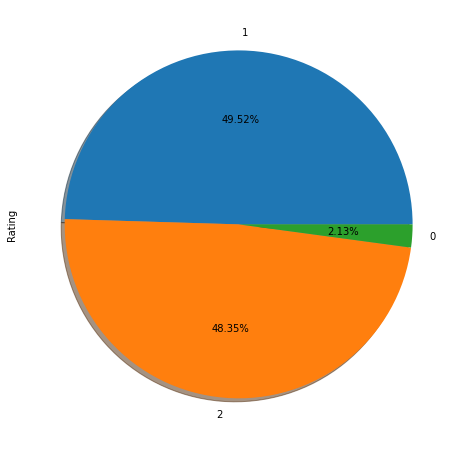

In [112]:
df["Rating"].value_counts().plot.pie(figsize=(8,8), shadow=True, autopct="%1.2f%%")